# At first, play a bit with MNIST

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

## Check format of data

In [2]:
def print_public_fields(obj):
    for field in dir(obj):
        field_is_private = field[0] == '_' or field[1] == '_'
        if not field_is_private:
            print(field, type(getattr(obj, field)))

In [3]:
print_public_fields(mnist)

count <class 'builtin_function_or_method'>
index <class 'builtin_function_or_method'>
test <class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
train <class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
validation <class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>


In [4]:
print_public_fields(mnist.test)

epochs_completed <class 'int'>
images <class 'numpy.ndarray'>
labels <class 'numpy.ndarray'>
next_batch <class 'method'>
num_examples <class 'int'>


### Check format of images

In [11]:
from matplotlib import pyplot as plt

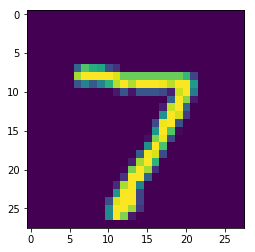

In [32]:
image = mnist.test.images[0]
image = image.reshape((28, -1))
plt.imshow(image)
plt.show()

In [31]:
print("Pixel values in range: [{}; {}]".format(image.min(), image.max()))

Pixel values in range: [0.0; 1.0]


### Train simple linear regression

In [2]:
img_len = 28*28
num_classes = 10
batch_size = 64 # Play with this parameter
test_dataset_length = len(mnist.test.labels)

In [3]:
import tensorflow as tf

In [4]:
graph = tf.Graph()

with graph.as_default():
    Xs = tf.placeholder(tf.float32, shape=[None, img_len])
    Ys = tf.placeholder(tf.float32, shape=[None, num_classes])
    
    W = tf.Variable(tf.truncated_normal(shape=[img_len, num_classes]))
    b = tf.Variable(tf.zeros([num_classes]))
    
    logits = tf.matmul(Xs, W) + b
    loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(Ys, logits))
    
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    
    # test
    test_predictions = tf.nn.softmax(tf.matmul(Xs, W) + b)
    correct_prediction = tf.equal(tf.argmax(Ys,1), tf.argmax(test_predictions,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
num_steps = 20000

valid_data, valid_labels = mnist.validation.next_batch(batch_size)

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    for step in range(num_steps):
        train_data, train_labels = mnist.train.next_batch(batch_size)
        l, _ = session.run([loss, optimizer], feed_dict={Xs: train_data, Ys: train_labels})
        if step % 2000 == 0:
            l = session.run(loss, feed_dict={Xs: valid_data, Ys: valid_labels})
            print("[{} step] Loss for validation dataset is {}".format(step, l))
    
    test_accuracy = session.run(accuracy, feed_dict={Xs: mnist.test.images, Ys: mnist.test.labels})
    print("Test accuracy is ", test_accuracy)

[0 step] Loss for validation dataset is 12.888274192810059
[2000 step] Loss for validation dataset is 0.270382285118103
[4000 step] Loss for validation dataset is 0.2436733841896057
[6000 step] Loss for validation dataset is 0.2596595585346222
[8000 step] Loss for validation dataset is 0.29431813955307007
[10000 step] Loss for validation dataset is 0.21821440756320953
[12000 step] Loss for validation dataset is 0.2246493250131607
[14000 step] Loss for validation dataset is 0.2179436981678009
[16000 step] Loss for validation dataset is 0.25291672348976135
[18000 step] Loss for validation dataset is 0.24580085277557373
Test accuracy is  0.9189


Complete these tutorials by yourself.

* https://www.tensorflow.org/get_started/mnist/beginners
* https://www.tensorflow.org/get_started/mnist/pros

And read this article
http://colah.github.io/posts/2015-09-Visual-Information/

Also experiment with parameters and also try RNN from official Tensorflow tutorial on this link.
https://www.tensorflow.org/tutorials/

ALso if you have a time play with tutorials on the link above

# Simple convolution neural network 

In [8]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [10]:
num_classes = 10

In [20]:
graph = tf.Graph()

with graph.as_default():
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, num_classes])
    
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    
    W_fc1 = weight_variable([7*7*64, 1024])
    b_fc1 = bias_variable([1024])
    
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y_conv, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict = {x: batch[0], y_: batch[1], keep_prob: 1.0})
            print("step {}, training accuracy {}".format(i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        
    print("test accuracy {}".format(accuracy.eval(feed_dict={
                    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})))

step 0, training accuracy 0.05999999865889549
step 100, training accuracy 0.8799999952316284
step 200, training accuracy 0.9399999976158142
step 300, training accuracy 0.8999999761581421
step 400, training accuracy 0.9599999785423279
step 500, training accuracy 0.9599999785423279
step 600, training accuracy 0.9599999785423279
step 700, training accuracy 0.9599999785423279
step 800, training accuracy 0.9200000166893005
step 900, training accuracy 0.9800000190734863
step 1000, training accuracy 0.9599999785423279
step 1100, training accuracy 1.0
step 1200, training accuracy 0.8799999952316284
step 1300, training accuracy 1.0
step 1400, training accuracy 1.0
step 1500, training accuracy 0.9599999785423279
step 1600, training accuracy 0.9599999785423279
step 1700, training accuracy 0.9800000190734863
step 1800, training accuracy 0.9599999785423279
step 1900, training accuracy 0.9800000190734863
step 2000, training accuracy 1.0
step 2100, training accuracy 0.9800000190734863
step 2200, trai

------------

# Implementing house numbers recognizer

## Step 1: Design and test a model architecture that can identify sequences of digits in an image.

### Generate empty digit in a sequence

-0.0705977004075


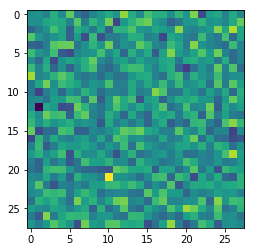

In [31]:
img = np.random.normal(size=[28, 28])
print(img.mean())
plt.imshow(img)
plt.show()

In [37]:
len(mnist.train.labels)

55000

### Working for batch generator  
Input data is 1 'long' image obtained   
from merging 5 images with digits and some empty images  

Labels are for 6 classifiers.  
Each responds for it's digit and one respond for length of sequence 

Ideas:
* To make batches uniform we will generate sequencies from 1 to 5 and repeat

Q
In SVHM dataset digits not always at the same positions
Will it be good to learn not only
```
d d d * * *
d * * * * *

but also these ?
* * d d d d
* d * d * d
```

In [157]:
a = np.ones([3, 3, 3])

In [3]:
# Optimize this shit someone
class BatchGenerator:
    def __init__(self, mnist, digits_limit=5):
        # self._mnist = mnist
        self._digits_limit = digits_limit
        
    def _noise_image(self):
        img = np.random.normal(0, 0.1, size=[28, 28])
        diff = img.max() - img.min()
        norm_img = (img - img.min()) / diff
        return norm_img
        
    def _empty_image(self):
        return np.zeros([28, 28])
    
    def _empty_label(self):
        return np.zeros([10])
    
    # fixme: maybe too long names for variables
    def next_image(self, digits_count):
        '''
        Returns 
        
        First val: image with digits
        image of shape [28, 28*self.__digits_limit]
        where Each 28x28 part is a image from MNIST dataset
        or normalized to [0, 1] empty image (numpy.random.normal())
        or just zero filled matrix
        
        Second val: labels for top digits classifiers (by default there is 5 of them)
        array of shape [self.__digits_limit, 10]
        label for empty image is [0 x 10]
        
        Third value: count of empty images used here
        '''
        digits, digits_labels = mnist.train.next_batch(digits_count)
        digits = digits.reshape([-1, 28, 28]) # vec to image
        
        # Generate long image with digits_count in it
        image_parts = np.empty([self._digits_limit, 28, 28])
        image_parts[:digits_count] = digits
        image_parts[digits_count:self._digits_limit] = self._empty_image()
        
        image = np.hstack(image_parts)
        
        # Generate labels
        labels = np.empty([self._digits_limit, 10])
        labels[:digits_count] = digits_labels
        labels[digits_count:self._digits_limit] = self._empty_label()
        
        empties_count = self._digits_limit - digits_count
        return image, labels, empties_count
    
    # It can be done in a faster way using numpy operations
    # Rewrite it later
    def next(self, count):
        images = np.empty([count, 28, 28*self._digits_limit])
        labels = np.empty([count, self._digits_limit, 10])
        empties_count = np.empty(count)
        
        for i in range(count):
            digits_count = i % (self._digits_limit + 1)
            images[i], labels[i], empties_count[i] = self.next_image(digits_count)
        
        labels = (np.hstack(labels)).reshape([self._digits_limit, -1, 10])
        images = images.reshape([count, 28, 28*self._digits_limit, 1]) # Add one last channel dimension
        return images, labels, empties_count

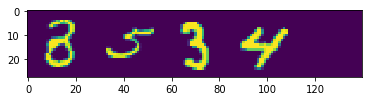

On this image is (are) 1 empty digit(s)
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [4]:
bg = BatchGenerator(mnist, 5)
image, labels, empties_count = bg.next_image(4)
plt.imshow(image)
plt.show()
print(f'On this image is (are) {empties_count} empty digit(s)')
print(labels)

In [5]:
bg.next(2)

(array([[[[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         ..., 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]]],
 
 
        [[[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.

### Neural network

In [6]:
# Operations wrappers
def weights_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.2)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [7]:
digits_per_image = 5

In [8]:
graph = tf.Graph()

with graph.as_default():
    # conv > pool > conv > pool > fc1 > dropout > fc2
    x = tf.placeholder(tf.float32, shape=[None, 28, digits_per_image*28, 1])
    ys = tf.placeholder(tf.float32, shape=[digits_per_image, None, 10])
    y_cnt = tf.placeholder(tf.float32, shape=[None])
    
    W_conv1 = weights_variable([5, 5, 1, 32])
    b_conv1 = bias_variable(32)
    
    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
    h_pool1 = max_pool2x2(h_conv1)
    
    W_conv2 = weights_variable([5, 5, 32, 64])
    b_conv2 = bias_variable(64)
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool2x2(h_conv2)
    
    # A little bit hacky.
    # I should learn to calc conv shapes in mind on fly
    flat_size = int(h_pool2.shape[1] * h_pool2.shape[2] * h_pool2.shape[3])
    print(h_pool2.shape, flat_size)
    
    fc1_size = 1024
    W_fc1 = weights_variable([flat_size, fc1_size])
    b_fc1 = bias_variable([fc1_size])
    
    h_pool2_flat = tf.reshape(h_pool2, [-1, flat_size])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    keep_prob = tf.placeholder(tf.float32)
    dropout = tf.nn.dropout(h_fc1, keep_prob)
    
    image_embeds = dropout
       
    classifiers_count = digits_per_image
    classifiers_weights = weights_variable([classifiers_count, fc1_size, 10])
    classifiers_biases = bias_variable([classifiers_count, 10])
    
    # We can try 2 approaches to calculate loss function
    # 1 is to summ all losses
    # average_loss = 0
    summary_loss = 0
    losses = [None for i in range(classifiers_count)]
    logits = [None for i in range(classifiers_count)]
    for i in range(digits_per_image):
        w = classifiers_weights[i]
        b = classifiers_biases[i]
        logits[i] = tf.matmul(image_embeds,w)+b
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=ys[i], logits=logits[i])
        loss = tf.reduce_mean(cross_entropy)
        
        losses[i] = loss
        summary_loss += loss
        
    # 2 is to optimize each classifier separately
    # Just use array of optimizers and optimize in cycle for each loss
    # While now it doesn't lead to overfitting (for 100 iterations)
    train_steps = [None for i in range(classifiers_count)]
    for i in range(digits_per_image):
        w = classifiers_weights[i]
        b = classifiers_biases[i]
        logit = tf.matmul(image_embeds,w)+b
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=ys[i], logits=logit)
        loss = tf.reduce_mean(cross_entropy)   
        train_steps[i] = tf.train.AdamOptimizer().minimize(loss)
        losses[i] = loss
           
    # TOdo read about these optimizers
    # Fortunately there is a good course on Coursera
    optimizer = tf.train.AdamOptimizer(learning_rate=0.005)
    train_step = optimizer.minimize(summary_loss)
    # optimizer.minimize()
    
    predictions = None

(?, 7, 35, 64) 15680


In [11]:
num_steps = 50
bg = BatchGenerator(digits_per_image)
batch_size = 64

with tf.Session(graph=graph) as session:
    session.run(tf.global_variables_initializer())
    for i in range(num_steps):
        images, labels, empties_counts = bg.next(batch_size)
        feed_dict = {
            x: images,
            ys: labels,
            y_cnt: empties_counts,
            keep_prob: 1.0
        }
        
        
#         # 2-nd variant 
#         for j in range(digits_per_image):
#             l, _ = session.run([losses[j], train_steps[j]], feed_dict = feed_dict)
#             print(f'{i} step: {j} classifier loss: {l}')
#         print('=====' * 10)

        
        # 1-st variant
        l, _ = session.run([summary_loss, train_step], feed_dict = feed_dict)
        print(l)

347.212
876.465
506.419
376.816
223.564
147.769
70.5532
44.7857
26.0543
14.0151
9.07574
6.37507
6.16876
5.87832
5.6688
5.65621
5.6212
5.55176
5.61614
5.60167
5.60082
5.65445
5.62947
5.55732
5.60785
5.58666
5.68623
5.5209
5.65271
5.67545
5.80093
5.9937
6.22559
6.30318
7.22896
7.2492
8.15721
9.2528
9.90181
9.81142
12.5937
14.9113
19.3055
28.9343
36.1467
60.0904
83.6702
137.181
201.482
297.258


Any ideas?
Yes!

1) Maybe problem is in encoding of empty image  
2) Need regularization for covnet  
3) Need optimizer with Descending learning rate  
4) Bad dropout placement in network architecture  
5) maybe there should not be 0 images or empty images nullifying all weights (check 1 item of this list)  
6) Maybe add layer on the top of last NN layer

Also with every graph execution around 1Gb dissapears

### Work for bugs

1. can't see overfitting. All weights in range [-0.5, 0.5]